## *Customer Segmentation using RFM Analysis*

### Group 5
1. Saee Hemant Majlekar
2. Meghana Sreenivasa Rao
3. Somya Padhy 
#### Project 2
##### Submitted to: Sivarit Sultornsanee
##### Submission Date: Nov 20, 2024


In [10]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

#### 1. Data Overview

In [12]:
# Reading the csv file
df=pd.read_csv('data.csv', encoding='unicode_escape')

In [13]:
# To display the first few rows of the data
df.head(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom


In [14]:
# To cehck for missing values
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#####  Size of the dataset in terms of the number of rows and columns

In [16]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 406829
Number of columns: 8


##### Brief description of each column in the dataset

In [18]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

##### Description:
- InvoiceNo: It is a 6 digit number to store the details of the transaction
- StockCode: Unique code for the product
- Description: Product name
- Quantity: Quantity of each product during the transaction
- InvoiceDate: Time and date of the transaction
- UnitPrice: Price of each unit
- CustomerID: Unique identifier for each customer
- Country: Where the customer resides

##### Period covered by this dataset

In [21]:
# Converting the date datatype to datetime
df['DATE'] = pd.to_datetime(df['InvoiceDate'])

In [22]:
# Finding the minimum or start date
min_date = min(df['InvoiceDate'])

# Finding the maximum or most recent date
max_date = max(df['InvoiceDate'])

# To find the period covered in the dataset
print("The dataset contains data starting from", min_date, 'to', max_date)

The dataset contains data starting from 1/10/2011 10:32 to 9/9/2011 9:52


#### 2. Customer Analysis

##### Number of unique customers in the dataset

In [25]:
unique_customers = df['CustomerID'].nunique()
print("Number of unique customers are: " , unique_customers)

Number of unique customers are:  4372


##### Distribution of the number of orders per customer

In [27]:
transactions = len(df['InvoiceNo'].value_counts())
# Calculate the average number of orders per customer
order_per_customer = transactions / unique_customers
print('The distribution of the number of orders per customer is:', order_per_customer)

The distribution of the number of orders per customer is: 5.07548032936871


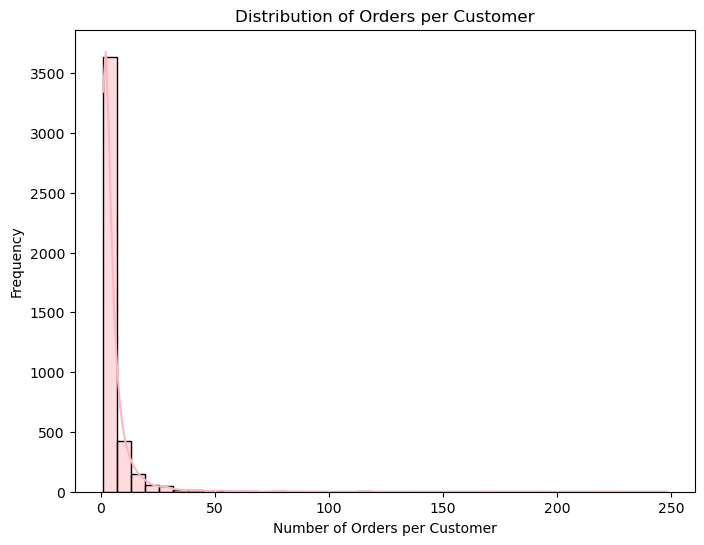

In [28]:
customer_order_counts = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Create a histogram to visualize the distribution of the number of orders per customer
plt.figure(figsize=(8, 6))
sns.histplot(customer_order_counts, bins=40, kde=True, color='lightpink')
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Frequency')
plt.title('Distribution of Orders per Customer')
plt.show()

##### Top 5 customers who have made the most purchases

In [30]:
customer_order_counts = df.groupby('CustomerID')['InvoiceNo'].nunique()
# Sort the customers based on the number of orders in descending order
sorted_customers = customer_order_counts.sort_values(ascending=False)
# For top 5
top_5_customers = sorted_customers.head(5)
print('The top 5 customers are:', '\n', top_5_customers)

The top 5 customers are: 
 CustomerID
14911.0    248
12748.0    224
17841.0    169
14606.0    128
13089.0    118
Name: InvoiceNo, dtype: int64


#### 3. Product Analysis

#####  Top 10 most frequently purchased products

In [33]:
top_products=df['Description'].value_counts().head(10)
print('Top products are:', '\n', top_products)

Top products are: 
 Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
LUNCH BAG RED RETROSPOT               1358
SET OF 3 CAKE TINS PANTRY DESIGN      1232
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1126
PACK OF 72 RETROSPOT CAKE CASES       1080
Name: count, dtype: int64


##### Averge price of products in the dataset

In [35]:
# Total proce of all products
total_price_of_product = df['UnitPrice'].sum()
# Total number of products
total_num_of_products=df['StockCode'].size
avg_price=total_price_of_product/total_num_of_products
print("Average price of a product is:", avg_price)

Average price of a product is: 3.460471018536043


##### Product category that generates the highest revenue

In [37]:
df['Cost']=df['UnitPrice']*df['Quantity']
product_revenue=df.groupby('Description')['Cost'].sum().reset_index()
# Identify the highest selling product 
highest_selling_product = product_revenue.max()
print("Highest selling product is:", highest_selling_product)

Highest selling product is: Description    ZINC WIRE SWEETHEART LETTER TRAY
Cost                                   132870.4
dtype: object


#### 4. Time Analysis

#####  Day of the week or time of day when most orders are placed

In [40]:
# Extract the day of the week from the 'DATE' column and create a new column day of week
df['Day of Week'] = df['DATE'].dt.dayofweek
# Extract the hour of the day from the 'DATE' column and create a new column hour of day
df['Hour of Day'] = df['DATE'].dt.hour

In [41]:
df1 = df.groupby(['Day of Week', 'Hour of Day']).agg({'Cost': 'sum', 'Quantity': 'sum'}).reset_index()
# Calculate the average order amount and add a new column 'Average Order Amount' to the DataFrame
df1['Average Order Amount'] = df1['Cost'] / df1['Quantity']

# Identify the day and hour with the highest average order amount
max_avg_order_day = df1[df1['Average Order Amount'] == df1['Average Order Amount'].max()]['Day of Week'].values[0]
max_avg_order_hour = df1[df1['Average Order Amount'] == df1['Average Order Amount'].max()]['Hour of Day'].values[0]

# Convert the day of the week to its corresponding name 
max_avg_order_day_name = dt.datetime.strptime(str(max_avg_order_day), '%w').strftime('%A')
print("The day of the week with the highest average order amount is:", max_avg_order_day_name)
print("The hour of the day with the highest average order amount is:", max_avg_order_hour)

The day of the week with the highest average order amount is: Monday
The hour of the day with the highest average order amount is: 19


##### Average order processing time

To find the average time it takes to process an order, we first identify the relevant timestamps in the dataset: when the order was placed and when it was completed or shipped. The difference between these timestamps gives the processing time for each order.

Once the processing times are calculated, the average can be obtained by summing all the processing times and dividing by the total number of orders.

import pandas as pd

Assume 'df' is a DataFrame with 'order_placed_time' and 'order_completed_time' columns.

Convert the columns to datetime format if they are not already
df['order_placed_time'] = pd.to_datetime(df['order_placed_time'])
df['order_completed_time'] = pd.to_datetime(df['order_completed_time'])

Calculate the processing time for each order
df['processing_time'] = (df['order_completed_time'] - df['order_placed_time']).dt.total_seconds()

Calculate the average processing time
average_processing_time_seconds = df['processing_time'].mean()
average_processing_time = pd.to_timedelta(average_processing_time_seconds, unit='s')

print(f"The average order processing time is: {average_processing_time}")


Here, the timestamps are converted to datetime format to ensure correct calculations. The processing time for each order is stored in a new column, processing_time. The mean of this column gives the average processing time, which is then converted from seconds into a more readable format using pd.to_timedelta

##### Seasonal Trends in the dataset

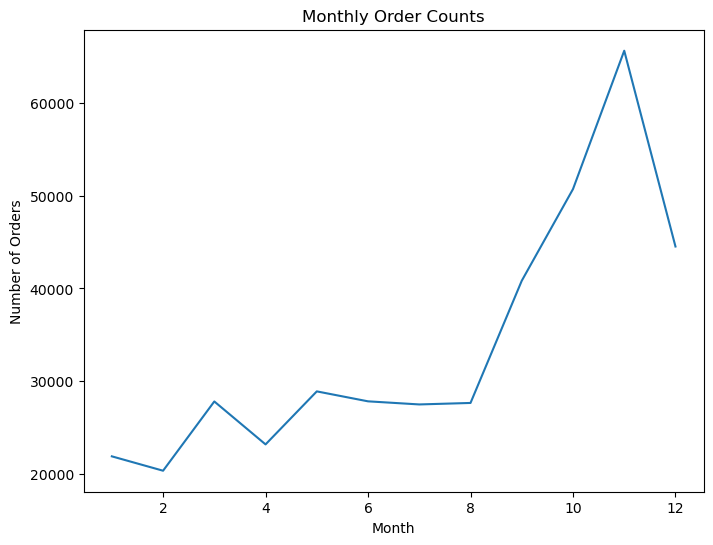

In [47]:
# Create a new column 'Month'
df['Month'] = df['DATE'].dt.month

# Count the number of orders for each month.
monthly_orders = df['Month'].value_counts()
import matplotlib.pyplot as plt
import seaborn as sns

# Lineplot
plt.figure(figsize=(8, 6))
sns.lineplot(x=monthly_orders.index, y=monthly_orders)

# Set labels and title for better interpretation.
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Order Counts')

# Display the plot.
plt.show()

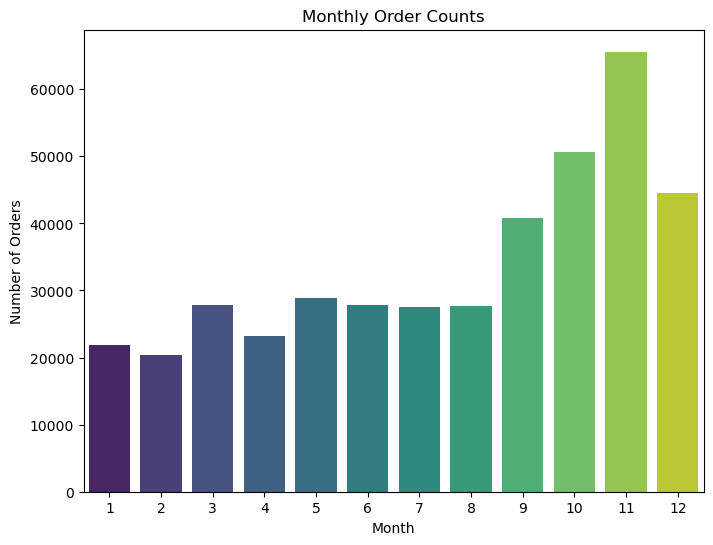

In [48]:
# Bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=monthly_orders.index, y=monthly_orders, palette="viridis")
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Order Counts')
plt.show()


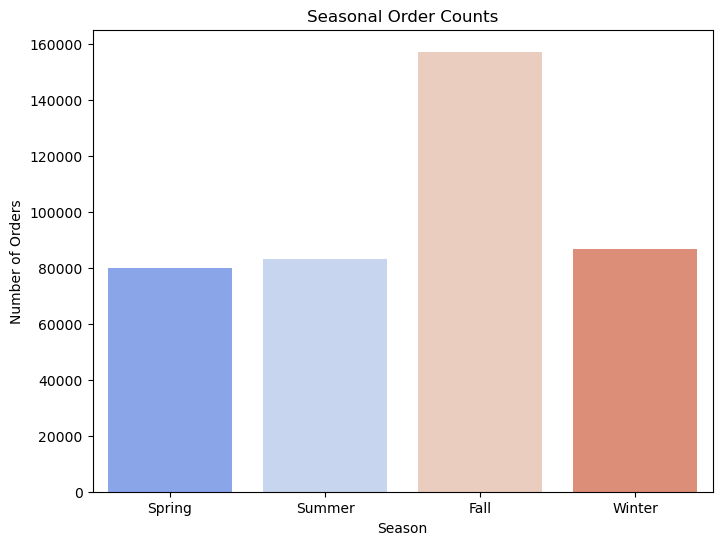

In [171]:
df['Month'] = df['DATE'].dt.month
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

# Creating a new column Season
df['Season'] = df['Month'].apply(get_season)
seasonal_orders = df['Season'].value_counts()

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_orders.index, y=seasonal_orders, order=['Spring', 'Summer', 'Fall', 'Winter'], palette="coolwarm")
plt.xlabel('Season')
plt.ylabel('Number of Orders')
plt.title('Seasonal Order Counts')

# Display the plot.
plt.show()

#### 5. Geographical Analysis

##### Top 5 countries with the highest number of orders

In [52]:
countries_per_customer = df['Country'].value_counts().reset_index()
countries_per_customer.columns = ['Country', 'Number of Orders']
print("The top 5 countries with the most orders are:", '\n', countries_per_customer.head(5))

The top 5 countries with the most orders are: 
           Country  Number of Orders
0  United Kingdom            361878
1         Germany              9495
2          France              8491
3            EIRE              7485
4           Spain              2533


##### Correlation between the country of the customer and the average order value

To explore whether there's a correlation between the customer’s country and the average order value, a structured analysis can be conducted using the dataset. At a minimum, the dataset should include details for each transaction: the customer’s country and the corresponding order value.

Approach:
1. Data Aggregation:
The data would be grouped by the customer's country, and the average order value would be calculated for each group.

2. Statistical Analysis:
To quantify the relationship, techniques such as a correlation coefficient (e.g., Pearson’s r) could be employed. Since the country is a categorical variable, it may need to be encoded numerically, such as with one-hot encoding, to use correlation analysis. Alternatively, statistical tests like ANOVA might be more appropriate for determining whether the country significantly impacts average order value.

3. Data Visualization:
Visual tools such as boxplots can be used to compare the distribution of average order values across different countries, helping to identify trends or differences.

4. Hypothesis Testing:
If notable differences are observed, hypothesis testing could confirm whether these differences are statistically significant.)
plt.show()
()
plt.show()


###### Calculate the average order value by country
country_order_values = df.groupby('Country')['OrderValue'].mean().reset_index()()
plt.show()
()
plt.show()


###### Visualize the results
```import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='OrderValue', data=country_order_values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.title('Average Order Value by Country')
plt.tight_layout()
plt.show()

#### 6. Payment Analysis
##### Most common payment methods used by customers

Steps:
1. Data Extraction: Extract the relevant transaction data, focusing primarily on the payment method field.
2. Data Cleaning: Clean the payment method data as needed for consistency. This could include merging similar categories (e.g., "Credit Card" and "CC") that represent the same payment method but are recorded differently.
3. Data Analysis: Aggregate the data to count how often each payment method appears.
4. Visualization: Use a bar chart to visualize the frequency of each payment method, making it easier to identify the most common ones.
5. Reporting: Summarize the findings in a report, incorporating visual aids, for presentation to the team.

payment_method_counts = df['PaymentMethod'].value_counts()


Bar plot to visualize the data:
```plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values)
plt.title('Most Common Payment Methods Used by Customers')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotatioverlap
plt.show()


#####  Relationship between the payment method and the order amount

- Data Preparation: Ensure the dataset includes both the payment method and order amount for each transaction.
- Statistical Analysis: To assess the relationship, we can use an ANOVA test (if order amounts are normally distributed) or a Kruskal-Wallis test (if not), to check for significant differences across payment methods.
- Data Visualization: Use boxplots to compare the distribution of order amounts across payment methods.
- Correlation Coefficient: While a correlation coefficient could be computed by converting payment methods to numerical codes, it's better to focus on comparing the means of each group due to the categorical nature of payment methods.

```plt.figure(figsize=(12, 6))
sns.boxplot(x='PaymentMethod', y='OrderAmount', data=df)
plt.title('Order Amount by Payment Method')
plt.xticks(rotation=45)
plt.show()
Perform ANOVA:
```order_amounts_by_payment = [group['OrderAmount'].values for name, group in df.groupby('PaymentMethod')]
anova_results = f_oneway(*order_amounts_by_payment)
print(f"ANOVA test results - Statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}")
If p-value < 0.05, it indicates significant differences in order amounts between payment methods.

#### 7. Customer Beheviour

##### Customer Activity Time between purchases

In [66]:
# Convert the 'InvoiceDate' column to datetime format.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate the time difference between the latest and earliest invoice dates for each customer.
time_diff = df.groupby('CustomerID')['InvoiceDate'].max() - df.groupby('CustomerID')['InvoiceDate'].min()
# Calculate the average
average_duration = time_diff.mean()
print(f'Average duration of customer activity: {average_duration}')

Average duration of customer activity: 133 days 17:25:29.204025618


In [90]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
customer_dates = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])
customer_dates['active_days'] = (customer_dates['max'] - customer_dates['min']).dt.days
average_active_days = customer_dates['active_days'].mean()
print("Mean of customers remaining active (between their first and last purchase)")
print(average_active_days)

Mean of customers remaining active (between their first and last purchase)
133.38586459286367


##### Customer Segments based on Purchase Beheviour

We are required to gather transactional data that includes customer identifiers, purchase amounts, frequencies, product categories, and any other relevant attributes to determine segments based on purchase beheviour.

#### 8. Returns and Refunds
#####  Percentage of orders that have experienced returns or refunds

Steps: 
1. Data Collection: Ensure the dataset has a column indicating if an order was returned or refunded (e.g., True/False or status codes).
2. Data Analysis: Calculate the total orders, returned/refunded orders, and their percentage ((returned/refunded / total) * 100).
3. Reporting: Share the percentage with stakeholders to assess customer satisfaction and efficiency.

```import pandas as pd

# Total orders
total_orders = len(df)

# Returned or refunded orders
returned_or_refunded_orders = df['ReturnedOrRefunded'].sum()

# Percentage calculation
percentage_returned_or_refunded = (returned_or_refunded_orders / total_orders) * 100

print(f"Percentage of Orders Returned or Refunded: {percentage_returned_or_refunded:.2f}%")


#####  Correlation between the product category and the likelihood of returns

Steps:
1. Calculate Return Rates:
    - Group the data by ProductCategory (or Description).
    - Calculate the total returns (sum) and total sales (count).
    - Compute return rates as (total returns / total sales) * 100.
2. Visualize Return Rates:
    - Create a bar plot of return rates for each product category using Matplotlib and Seaborn.
    - Rotate x-axis labels for better readability.
3. Chi-Square Test:
    - Create a contingency table for ProductCategory and Returned.
    -Perform the Chi-Square test to check the relationship between product categories and returns.

Assumed code if return/refund column data were present:
```import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
return_counts = df.groupby('Description')['Returned'].sum()
sale_counts = df.groupby('Description')['Returned'].count()
return_rates = return_counts / sale_counts * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=return_rates.index, y=return_rates.values)
plt.title('Return Rates by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.show()
contingency_table = pd.crosstab(df['Description'], df['Returned'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square test results - Statistic: {chi2}, p-value: {p}")


#### 9. Profitability Analysis
##### Total profit generated by the company
This data is not present in our dataset

```# Calculate totals
total_revenue = df['Revenue'].sum()
total_cost = df['UnitPrice'].sum()

# Calculate profit
total_profit = total_revenue - total_cost

# Display results
print(f"Total Revenue: {total_revenue}")
print(f"Total Cost: {total_cost}")
print(f"Total Profit: {total_profit}")


##### Five products with highest profit margins

```# Calculate profit margin
df['ProfitMargin'] = (df['Revenue'] - df['Cost']) / df['Revenue']

# Sort products by profit margin
sorted_products = df.groupby('Description')['ProfitMargin'].mean().sort_values(ascending=False)

# Select top 5 products
top_5_products = sorted_products.head(5)

# Visualize top 5 products
plt.figure(figsize=(10, 6))
top_5_products.plot(kind='bar')
plt.title('Top 5 Products with the Highest Profit Margins')
plt.xlabel('Product')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)
plt.show()


#### 10. Customer Satisfaction

Currently, there is no data available on customer feedback or ratings for products or services. As a result, sentiment analysis or trend analysis cannot be performed at this time.

### RFM Calculation

In [116]:
# Calculating Recency
current_date = max(df['DATE'])
recency = df.groupby('CustomerID')['DATE'].max().reset_index()
recency['Recency'] = (current_date - recency['DATE']).dt.days

# Calculating Frequency
frequency = df.groupby('CustomerID')['DATE'].count().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Calculating Monetary
monetary = df.groupby('CustomerID')['Cost'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
rfm.head()

,CustomerID,DATE,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:17:00,325,2,0.00
1,12347.0,2011-12-07 15:52:00,1,182,4310.00
2,12348.0,2011-09-25 13:13:00,74,31,1797.24
3,12349.0,2011-11-21 09:51:00,18,73,1757.55
4,12350.0,2011-02-02 16:01:00,309,17,334.40


In [118]:
# Ignore 0 in Monetary, we will not need those customers as they add no value to the company
rfm = rfm[rfm['Monetary']>0]

### RFM Segmentation

In [123]:
# Recency Score and Monetary Score: 5 = good, 1 = bad
# Frequency Score: 1 = good, 5 = bad

In [125]:
rfm["Recency_Score"]=pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1,])
rfm["Frequency_Score"]=pd.qcut(rfm["Frequency"].rank(method="first"),5,labels=[1,2,3,4,5])
rfm["Monetary_Score"]=pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])
rfm["RFM_Score"]=(rfm["Recency_Score"].astype(str)+rfm["Frequency_Score"].astype(str)+rfm["Monetary_Score"].astype(str))
rfm_data = rfm[['Recency_Score', 'Frequency_Score', 'Monetary_Score']]
rfm=rfm.sort_values("CustomerID",ascending=True)
rfm.head(7)

,CustomerID,DATE,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,5,5,5,555
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,2,3,4,234
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,4,4,4,444
4,12350.0,2011-02-02 16:01:00,309,17,334.40,1,2,2,122
5,12352.0,2011-11-03 14:37:00,35,95,1545.41,3,4,4,344
6,12353.0,2011-05-19 17:47:00,203,4,89.00,1,1,1,111
7,12354.0,2011-04-21 13:11:00,231,58,1079.40,1,3,4,134


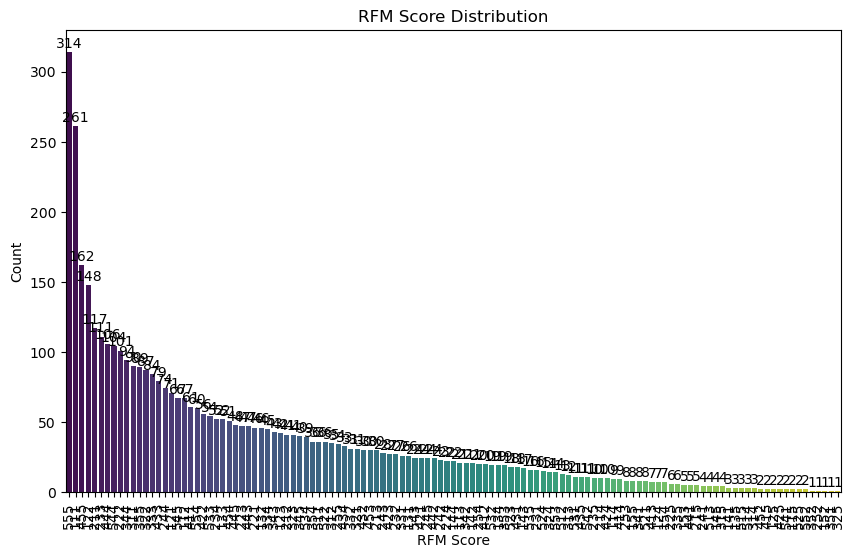

In [131]:
# Count plot to visualize RFM scores
import seaborn as sns
import matplotlib.pyplot as plt
# Create count plot
plt.figure(figsize=(10, 6))
sns.countplot(
    x='RFM_Score',
    data=rfm,
    order=rfm['RFM_Score'].value_counts().index,
    palette='viridis'  
)
for i, count in enumerate(rfm['RFM_Score'].value_counts()):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)
plt.title('RFM Score Distribution')
plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


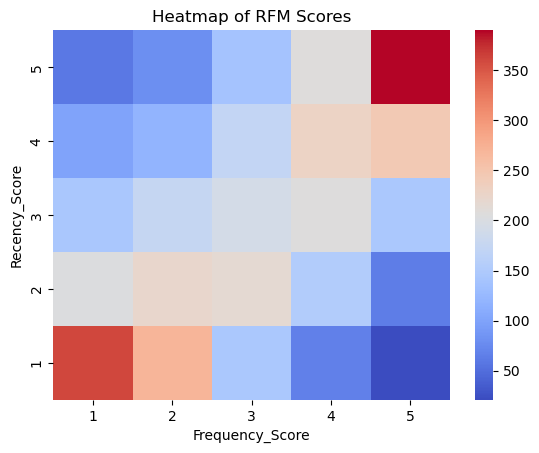

In [133]:
# Creating a pivot table
rfm_pivot = rfm.pivot_table(index='Recency_Score', columns='Frequency_Score', values='Monetary_Score', aggfunc='count')
sns.heatmap(rfm_pivot, cmap='coolwarm')
plt.title('Heatmap of RFM Scores')
plt.show()


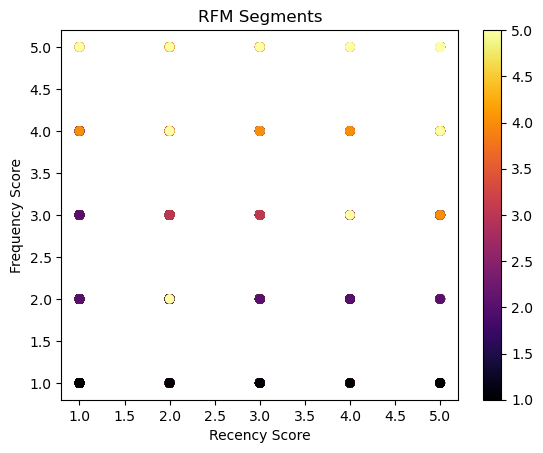

In [168]:
# Mapping scores to integers for color differentiation
rfm['Recency_Score_Num'] = rfm['Recency_Score'].astype(int)
rfm['Frequency_Score_Num'] = rfm['Frequency_Score'].astype(int)
plt.scatter(rfm['Recency_Score_Num'], rfm['Frequency_Score_Num'], c=rfm['Monetary_Score'].astype(int), cmap='inferno')
plt.colorbar()
plt.xlabel('Recency Score')
plt.ylabel('Frequency Score')
plt.title('RFM Segments')
plt.show()


### Customer Segmentation

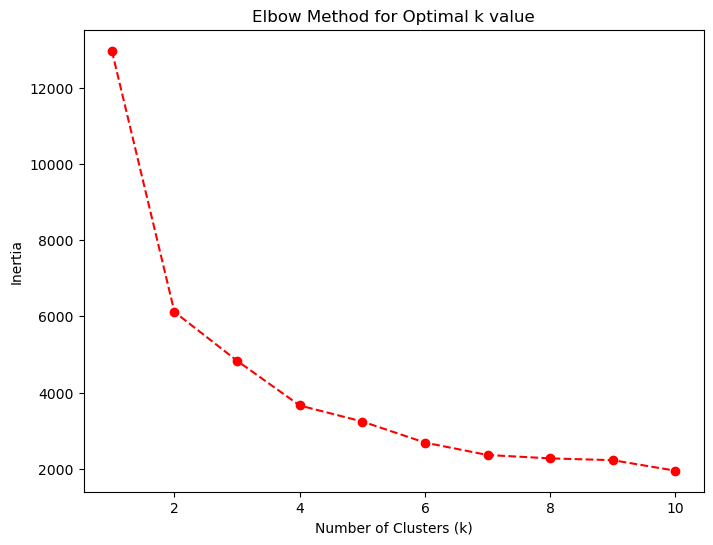

In [166]:
# Standardizing the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method 
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='red')
plt.title('Elbow Method for Optimal k value')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


Optimal number of clusters is 4

In [143]:
# Applying K-means with the k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++',n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Displaying the RFM table with clusters
rfm.head()

,CustomerID,DATE,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Recency_Score_Num,Frequency_Score_Num,Cluster
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,5,5,5,555,5,5,0
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,2,3,4,234,2,3,3
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,4,4,4,444,4,4,0
4,12350.0,2011-02-02 16:01:00,309,17,334.40,1,2,2,122,1,2,1
5,12352.0,2011-11-03 14:37:00,35,95,1545.41,3,4,4,344,3,4,3


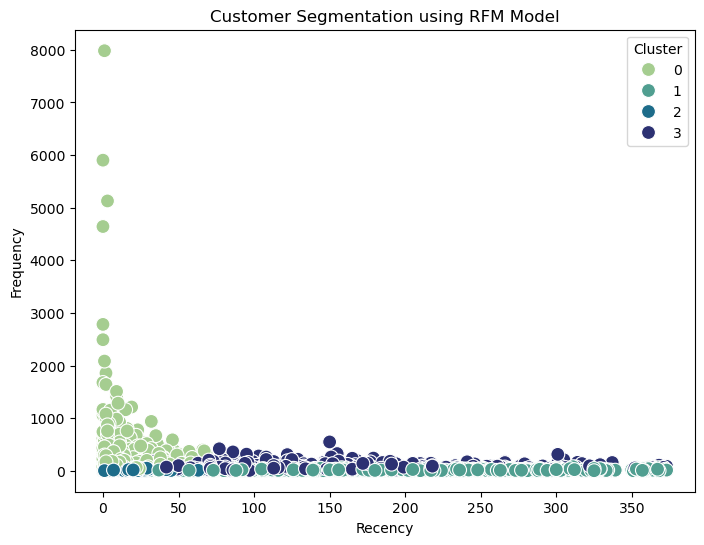

In [164]:
# Scatter plot to visualize customer segmentation 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm, palette='crest', s=100)
plt.title('Customer Segmentation using RFM Model')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')

plt.show()


### Segment Profiling

In [150]:
def assign_customer_group(RFM_Score):
    if RFM_Score == '144':
        return 'Top Customers'
    elif RFM_Score == '344':
        return 'At Risk'
    elif RFM_Score == '444':
        return 'Lost Big Spenders'
    elif RFM_Score == '441':
        return 'Lost Minimal Spenders'
    elif RFM_Score[1] == '4':
        return 'Frequent Customers'
    elif RFM_Score[2] == '4':
        return 'High Spenders'
    else:
        return 'Regular'


In [152]:
# Applying the function to create a new Segment column based on RFM_Score
rfm['Segment'] = rfm['RFM_Score'].apply(assign_customer_group)
rfm.head(7)

,CustomerID,DATE,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Recency_Score_Num,Frequency_Score_Num,Cluster,Segment
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,5,5,5,555,5,5,0,Regular
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,2,3,4,234,2,3,3,High Spenders
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,4,4,4,444,4,4,0,Lost Big Spenders
4,12350.0,2011-02-02 16:01:00,309,17,334.40,1,2,2,122,1,2,1,Regular
5,12352.0,2011-11-03 14:37:00,35,95,1545.41,3,4,4,344,3,4,3,At Risk
6,12353.0,2011-05-19 17:47:00,203,4,89.00,1,1,1,111,1,1,1,Regular
7,12354.0,2011-04-21 13:11:00,231,58,1079.40,1,3,4,134,1,3,3,High Spenders


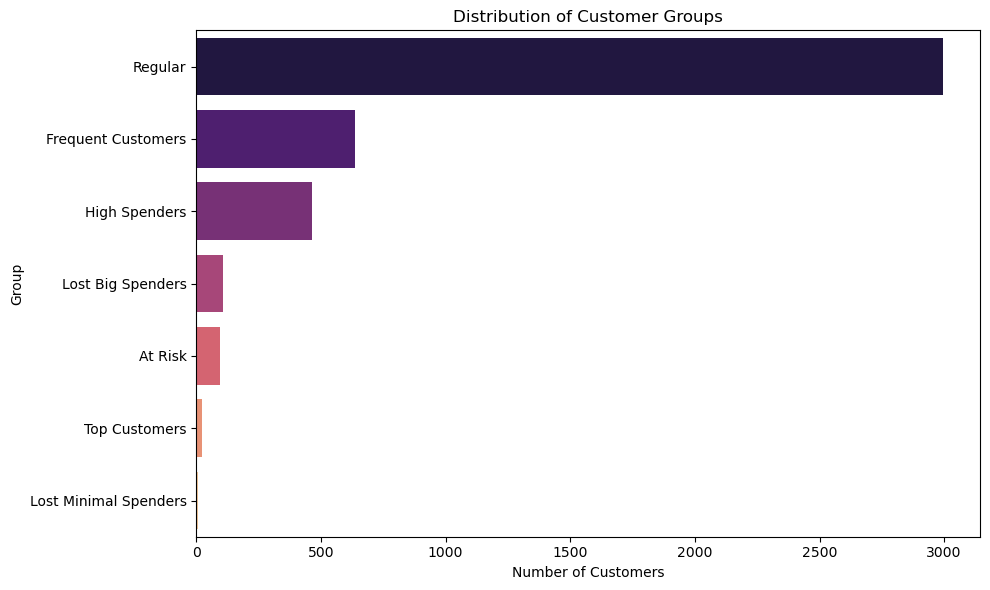

In [156]:
# Apply the get_group function to create a new 'Group' column
rfm['Group'] = rfm['RFM_Score'].apply(assign_customer_group)

# Visualize the distribution of the RFM groups with pastel colors
plt.figure(figsize=(10, 6))
sns.countplot(y='Group', data=rfm, order=rfm['Group'].value_counts().index, palette='magma')
plt.title('Distribution of Customer Groups')
plt.xlabel('Number of Customers')
plt.ylabel('Group')
plt.tight_layout()
plt.show()


In [158]:
print(rfm['Group'].value_counts())

Group
Regular                  2994
Frequent Customers        637
High Spenders             464
Lost Big Spenders         106
At Risk                    94
Top Customers              22
Lost Minimal Spenders       5
Name: count, dtype: int64


### Marketing Recommendations

Here are practical marketing suggestions for each customer segment to increase revenue and customer retention, based on the visualizations that show the distribution of customer segments, their RFM (Recency, Frequency, Monetary) scores, and the clustering of these segments:
1. Regular:
   - Strategy: Convert 'Regular' customers into more engaged segments.
   - Actionable Steps: Send targeted communications with personalized product recommendations, offer introductory discounts, and provide incentives for repeat purchases to encourage more frequent shopping.
2. Frequent Customers:
    - Strategy: Maintain and enhance their loyalty with exclusive rewards.
    - Actionable Steps: Create a loyalty program offering points or discounts, provide early access to sales, and send personalized offers to keep them engaged.
3. High Spenders:
    -Strategy: Maximize their high-spending behavior by offering exclusive experiences.
    -Actionable Steps: Provide VIP treatment with access to premium products, personalized shopping experiences, and invitations to exclusive sales or events.
4. Lost Big Spenders:
    - Strategy: Re-engage this group with personalized offers to win them back.
    - Actionable Steps: Send targeted offers, special discounts, or personalized product recommendations, and invite them to special sales events to reignite their interest.
5. At Risk:
    - Strategy: Prevent further churn by offering incentives to re-engage.
    - Actionable Steps: Offer time-sensitive discounts, send reminders of their past purchases, and collect feedback to address any issues that may be causing disengagement.
6. Top Customers:
    - Strategy: Reward and maintain their loyalty with personalized attention.
    - Actionable Steps: Offer exclusive perks like birthday gifts, personalized thank-you messages, and access to private sales or events to deepen their connection to the brand.